In [117]:
import pandas as pd 
    
# making dataframe 
#data = pd.read_excel(r'D:\Academics\5th SEM\DMPA LAB\Filtered_student.xlsx') 
data = pd.read_excel(r'D:\DWDM project\Performance.csv') 

# output the dataframe
#print(df)

In [118]:
data.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,guardian,schoolsup,famsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Stu_per,Avg_score
0,1,0,0,0,0,0,1,0,1,0,...,4,1,1,3,6,5,6,6,5,5.666667
1,1,0,0,0,1,0,4,1,0,1,...,3,1,1,3,4,5,5,6,5,5.333333
2,1,0,0,1,1,0,4,0,1,0,...,2,2,3,3,10,7,8,10,3,8.333333
3,1,0,0,0,1,3,2,0,0,1,...,2,1,1,5,2,15,14,15,1,14.666667
4,1,0,0,0,1,4,4,1,0,1,...,2,1,2,5,4,6,10,10,3,8.666667


In [119]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#X=data[['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','Walc','G1','G2','G3' ]]  # Features
#y=data['health']  # Labels
X=data[['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','absences','Walc','G1','G2','G3','Avg_score' ]]  # Features
y=data['Stu_per']  # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [120]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [121]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.907563025210084


In [122]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [124]:
import pandas as pd
feature_name = list(data.columns)
#print(feature_name)
#feature_name.remove('health')
feature_name.remove('Stu_per')
feature_name.remove('guardian')
#print(feature_name)
feature_imp = pd.Series(clf.feature_importances_,index=feature_name).sort_values(ascending=False)
feature_imp

Avg_score     0.253847
G3            0.151355
G2            0.143018
G1            0.113253
health        0.034956
age           0.018767
absences      0.017237
studytime     0.016376
freetime      0.016294
Dalc          0.016263
Mjob          0.016193
goout         0.016111
Fedu          0.016013
famrel        0.015670
Fjob          0.014194
Medu          0.014061
failures      0.013814
traveltime    0.011675
activities    0.010607
famsup        0.009157
Walc          0.009023
sex           0.008602
famsize       0.007908
Pstatus       0.007657
paid          0.007566
address       0.007433
romantic      0.007298
schoolsup     0.006786
nursery       0.005886
internet      0.005318
school        0.004634
higher        0.003027
dtype: float64

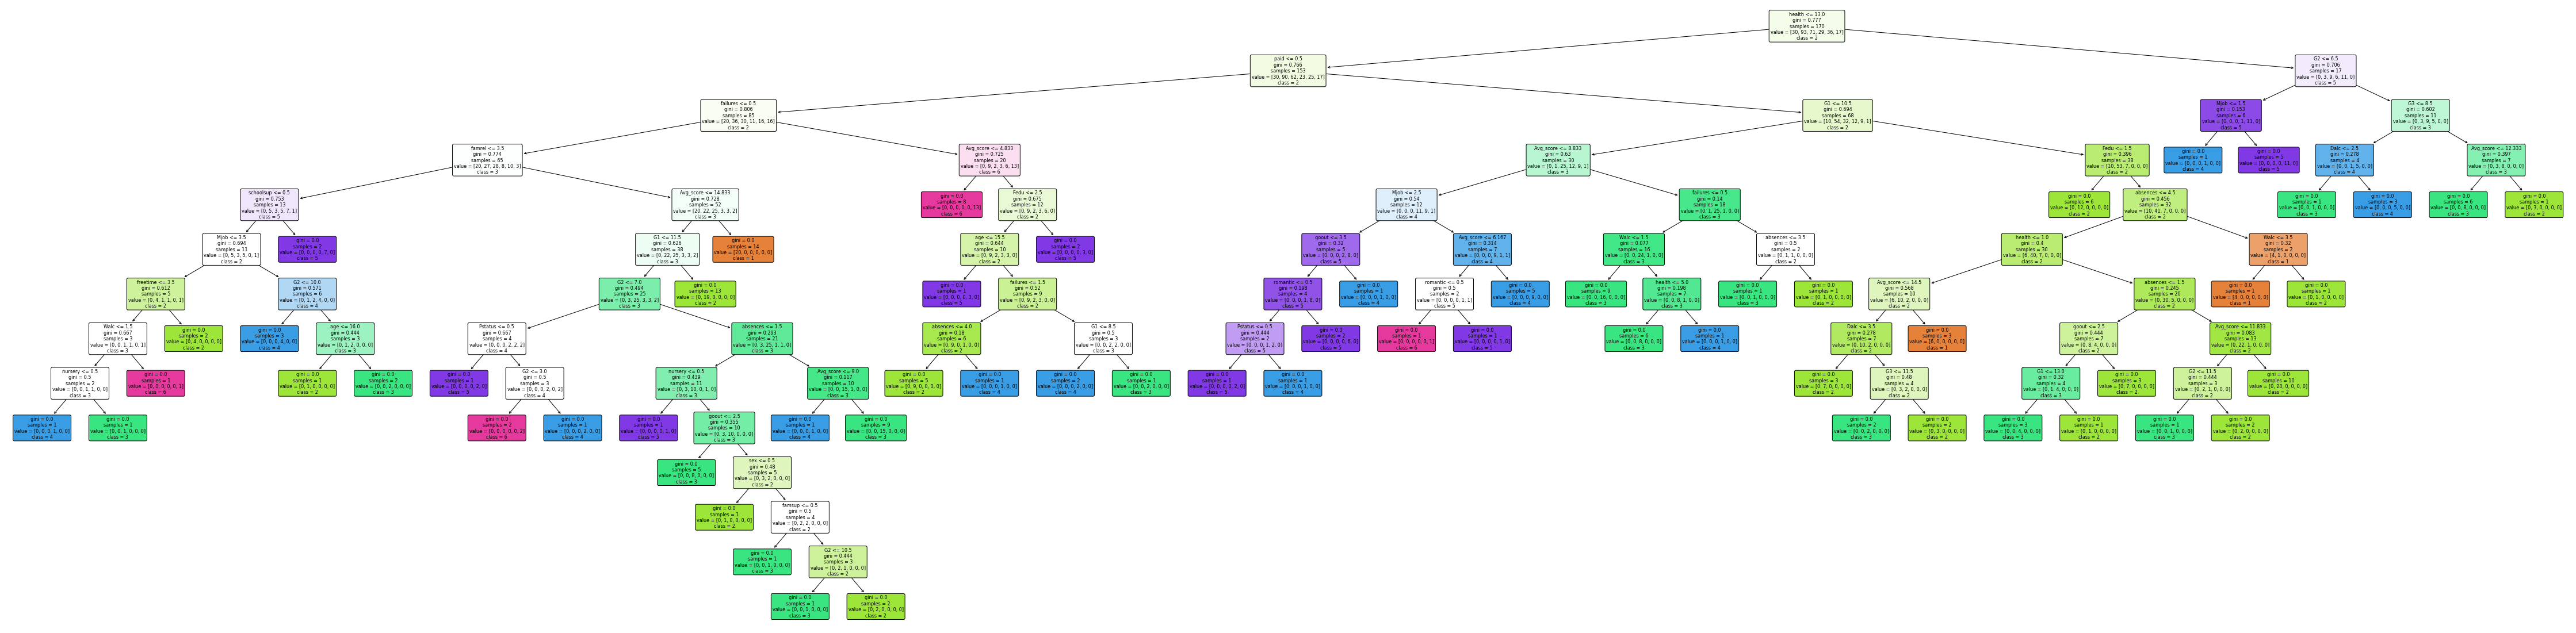

In [125]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tn = ['1','2','3','4','5','6']
fig = plt.figure(figsize=(80, 20))
plot_tree(clf.estimators_[0], 
          feature_names=feature_name,
          class_names=tn, 
          filled=True, impurity=True, 
          rounded=True)
fig.savefig('Decision_Tree.png')

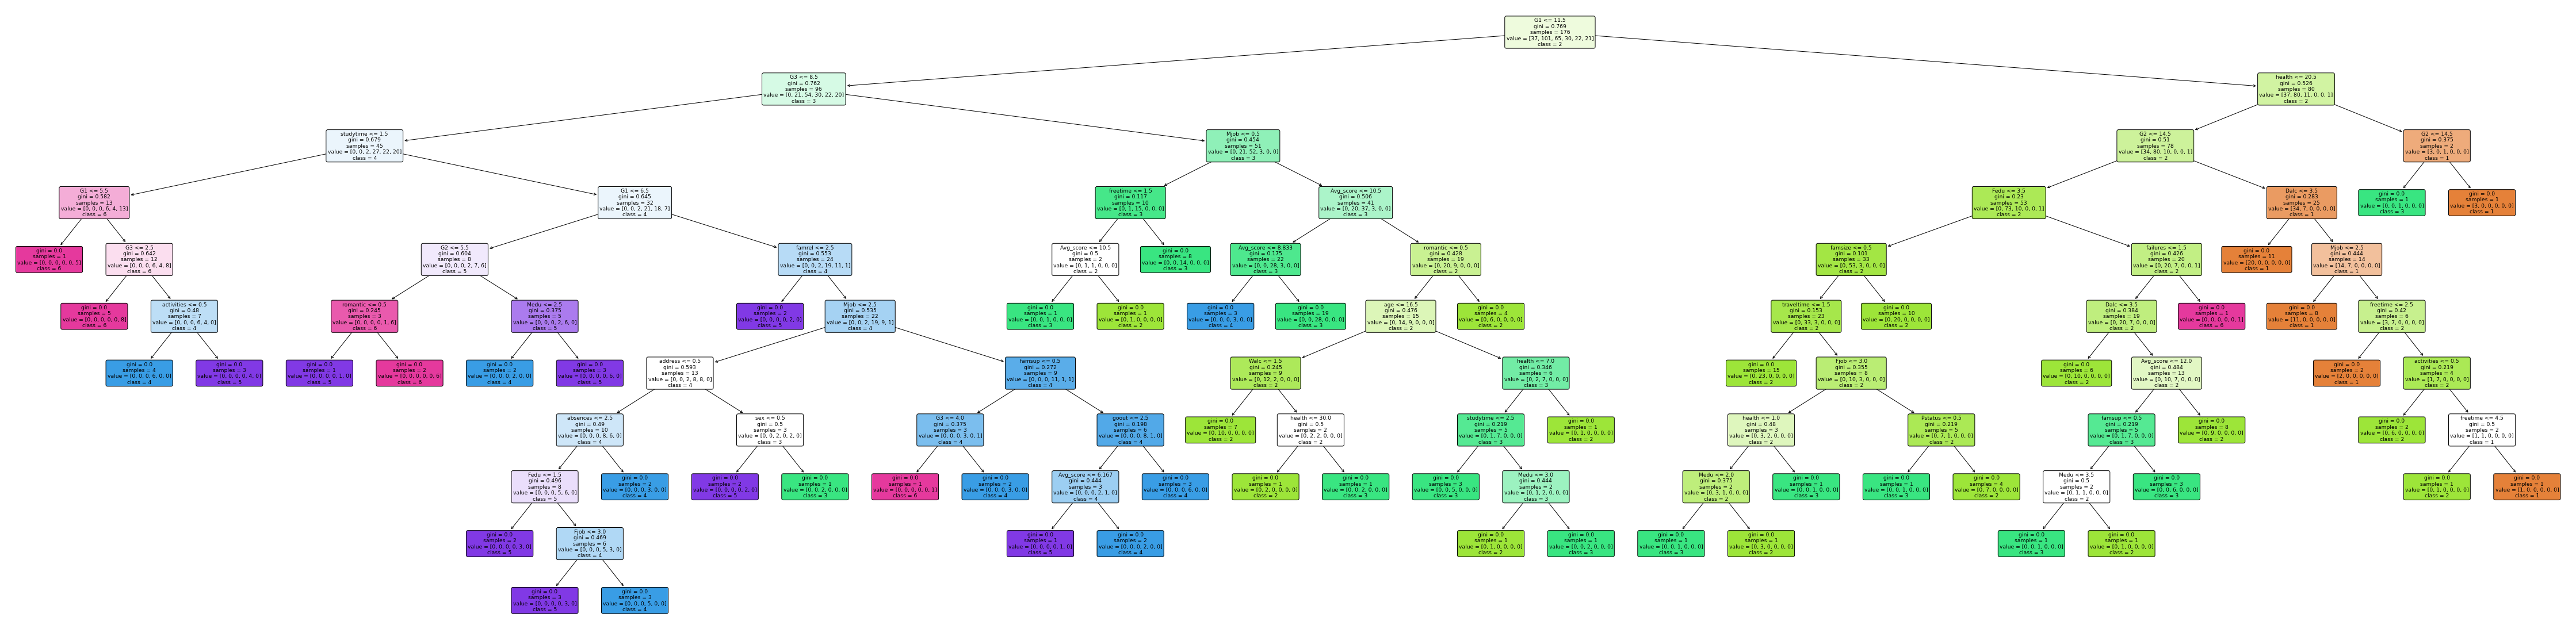

In [126]:
fig = plt.figure(figsize=(80, 20))
plot_tree(clf.estimators_[1], 
          feature_names=feature_name,
          class_names=tn, 
          filled=True, impurity=True, 
          rounded=True)
fig.savefig('Decision_Tree1.png')

<AxesSubplot:>

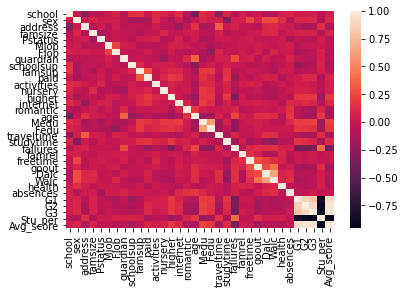

In [127]:
import seaborn
seaborn.heatmap(data.corr(),
                xticklabels=data.columns,
                yticklabels=data.columns)

No handles with labels found to put in legend.


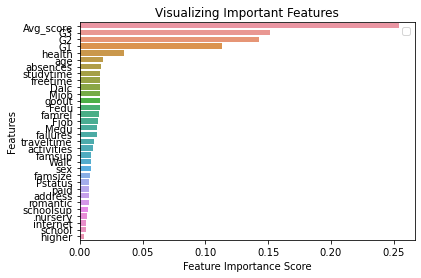

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [129]:
z = [1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,18,4,4,2,2,0,2,3,4,5,1,6,5,9,9,10,12]
k = clf.predict([z])
print(k)

[3]


In [72]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels

X1=data[['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','absences','Walc' ]]  # Features
y1=data['Stu_per']
# Split dataset into training set and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.70, random_state=5) # 70% training and 30% test

In [73]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train1,y_train1)

# prediction on test set
y_pred1=clf1.predict(X_test1)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.30685920577617326


In [74]:
import pandas as pd
feature_name1 = ['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','absences','Walc' ]

feature_imp1 = pd.Series(clf1.feature_importances_,index=feature_name1).sort_values(ascending=False)
feature_imp1

absences      0.085085
age           0.057109
freetime      0.056279
Mjob          0.054034
goout         0.053384
Walc          0.053317
health        0.049847
failures      0.049608
studytime     0.045367
Medu          0.044798
Fjob          0.044173
Fedu          0.043230
famrel        0.041629
traveltime    0.030573
Dalc          0.029230
guardian      0.029016
activities    0.025607
paid          0.023460
sex           0.023430
famsup        0.021965
famsize       0.021904
romantic      0.021483
nursery       0.017127
address       0.015515
schoolsup     0.015292
internet      0.014561
Pstatus       0.012738
higher        0.011622
school        0.008616
dtype: float64

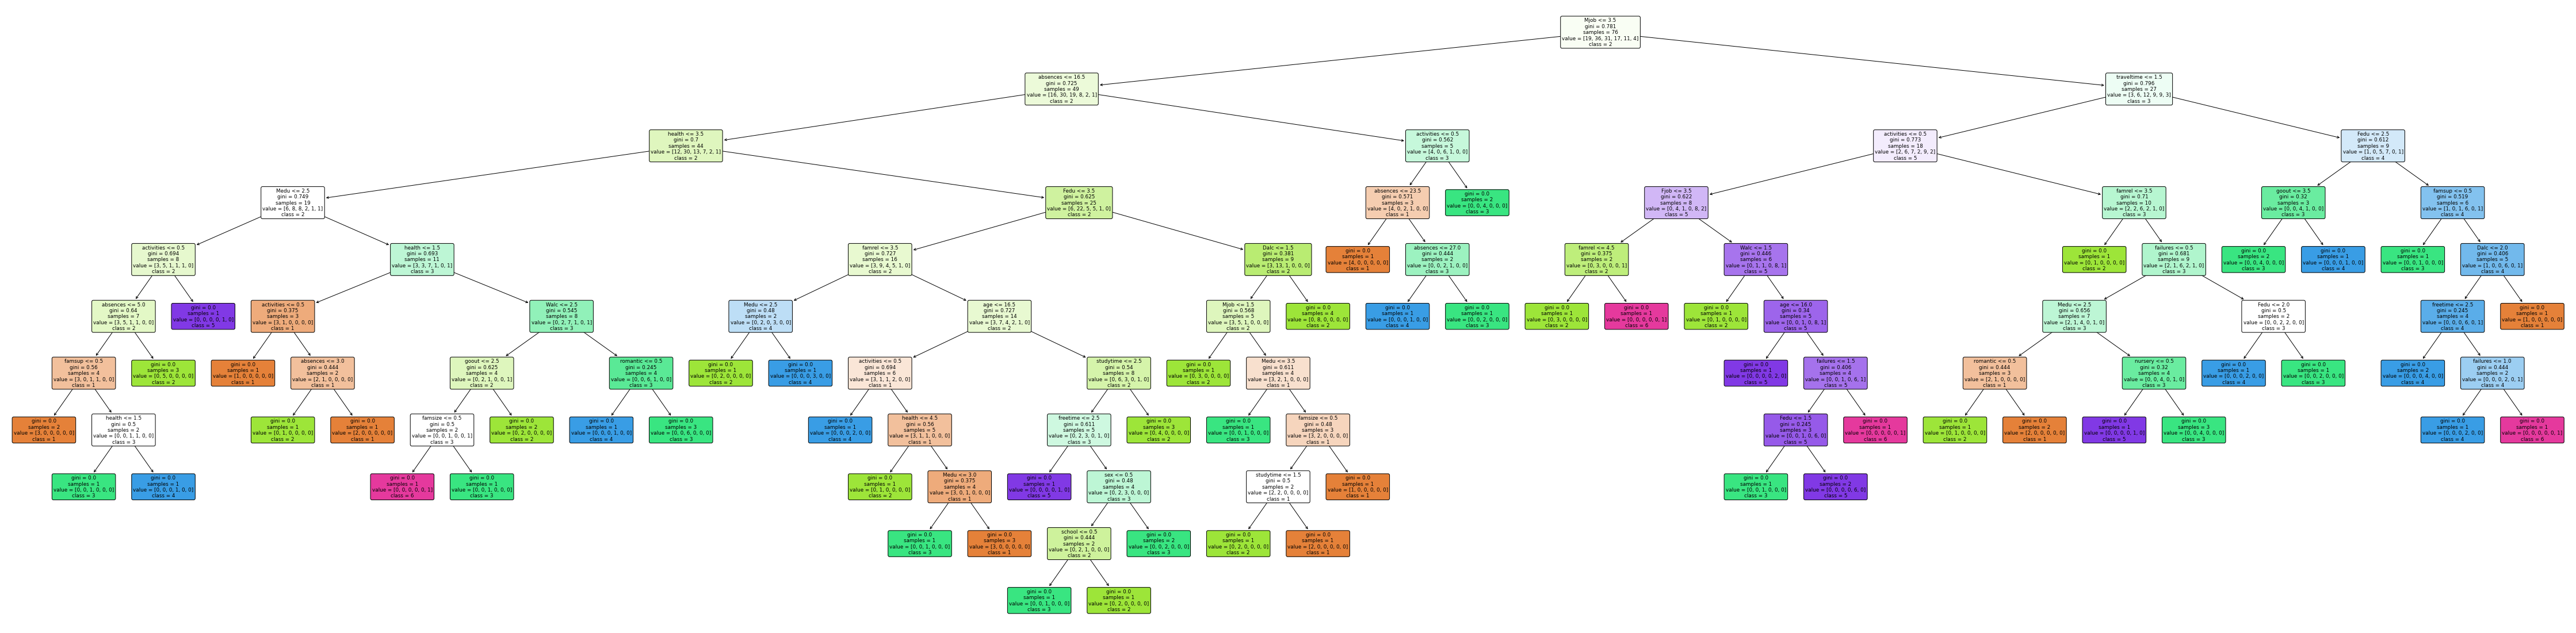

In [75]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tn1 = ['1','2','3','4','5','6']
fig1 = plt.figure(figsize=(80, 20))
plot_tree(clf1.estimators_[0], 
          feature_names=feature_name1,
          class_names=tn1, 
          filled=True, impurity=True, 
          rounded=True)
fig1.savefig('Decision_Tree4.png')

No handles with labels found to put in legend.


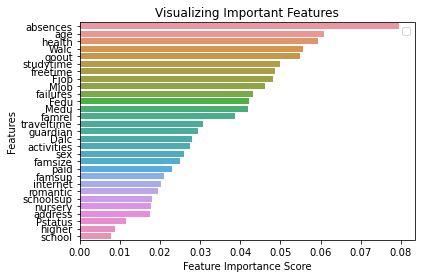

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp1, y=feature_imp1.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [98]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels

X5=data[['school','sex','famsize','Pstatus','Mjob','Fjob','schoolsup','famsup', 'paid','activities','higher','internet','romantic','age','traveltime','studytime','failures','famrel','freetime','goout','Dalc','absences','Walc','Avg_score' ]]  # Features
y5=data['health']
# Split dataset into training set and test set
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.70, random_state=5) # 70% training and 30% test

In [99]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf5=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf5.fit(X_train5,y_train5)

# prediction on test set
y_pred5=clf5.predict(X_test5)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.30324909747292417


In [100]:
import pandas as pd
feature_name5 = ['school','sex','famsize','Pstatus','Mjob','Fjob','schoolsup','famsup', 'paid','activities','higher','internet','romantic','age','traveltime','studytime','failures','famrel','freetime','goout','Dalc','absences','Walc','Avg_score' ]

feature_imp5 = pd.Series(clf.feature_importances_,index=feature_name).sort_values(ascending=False)
feature_imp5

absences      0.079398
age           0.060798
health        0.059310
Walc          0.055548
goout         0.054960
studytime     0.049837
freetime      0.048717
Fjob          0.048064
Mjob          0.046112
failures      0.043162
Fedu          0.042099
Medu          0.041982
famrel        0.038646
traveltime    0.030772
guardian      0.029360
Dalc          0.027995
activities    0.027442
sex           0.025979
famsize       0.025038
paid          0.022882
famsup        0.020954
internet      0.020172
romantic      0.019493
schoolsup     0.017932
nursery       0.017687
address       0.017537
Pstatus       0.011606
higher        0.008808
school        0.007709
dtype: float64

No handles with labels found to put in legend.


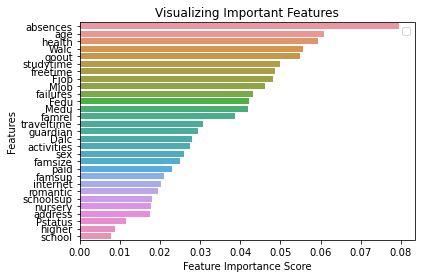

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp5, y=feature_imp5.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [77]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [78]:
data3 = pd.read_excel(r'D:\Academics\5th SEM\DMPA LAB\Performance.xlsx') 

In [79]:
data3.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,guardian,schoolsup,famsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Stu_per,Avg_score
0,1,0,0,0,0,0,1,0,1,0,...,4,1,1,3,6,5,6,6,5,5.666667
1,1,0,0,0,1,0,4,1,0,1,...,3,1,1,3,4,5,5,6,5,5.333333
2,1,0,0,1,1,0,4,0,1,0,...,2,2,3,3,10,7,8,10,3,8.333333
3,1,0,0,0,1,3,2,0,0,1,...,2,1,1,5,2,15,14,15,1,14.666667
4,1,0,0,0,1,4,4,1,0,1,...,2,1,2,5,4,6,10,10,3,8.666667


In [87]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#X=data[['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','Walc','G1','G2','G3' ]]  # Features
#y=data['health']  # Labels
X3=data[['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','absences','Walc','G1','G2','G3','Avg_score' ]]  # Features
y3=data['Stu_per']  # Labels
# Split dataset into training set and test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3) # 70% training and 30% test

In [88]:
#Import Random Forest Model
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
clf3=DecisionTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf3.fit(X_train3,y_train3)

y_pred3=clf3.predict(X_test3)

In [89]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8151260504201681


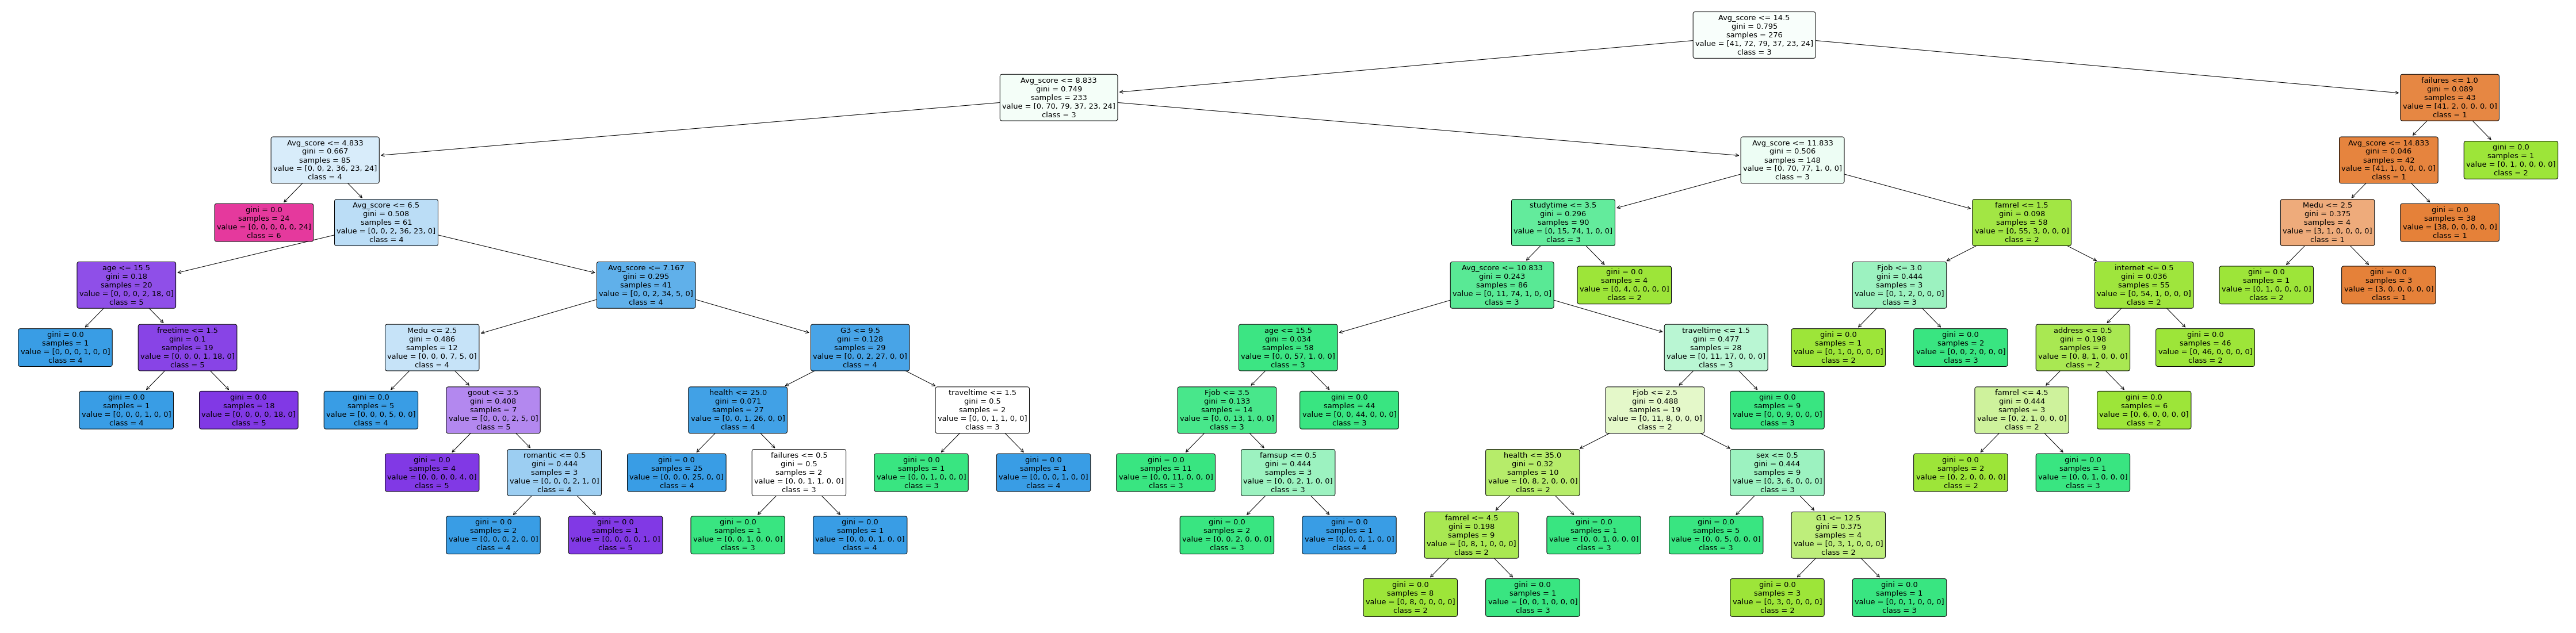

In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_name3 = list(data.columns)
feature_name3.remove('Stu_per')
feature_name3.remove('guardian')
tn3 = ['1','2','3','4','5','6']
fig3 = plt.figure(figsize=(80, 20))
plot_tree(clf3, 
          feature_names=feature_name3,
          class_names=tn3, 
          filled=True, impurity=True, 
          rounded=True)
fig3.savefig('Decision_Tree3.png')

In [90]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [91]:
data4 = pd.read_excel(r'D:\Academics\5th SEM\DMPA LAB\Performance.xlsx') 
data4.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,guardian,schoolsup,famsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Stu_per,Avg_score
0,1,0,0,0,0,0,1,0,1,0,...,4,1,1,3,6,5,6,6,5,5.666667
1,1,0,0,0,1,0,4,1,0,1,...,3,1,1,3,4,5,5,6,5,5.333333
2,1,0,0,1,1,0,4,0,1,0,...,2,2,3,3,10,7,8,10,3,8.333333
3,1,0,0,0,1,3,2,0,0,1,...,2,1,1,5,2,15,14,15,1,14.666667
4,1,0,0,0,1,4,4,1,0,1,...,2,1,2,5,4,6,10,10,3,8.666667


In [94]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#X=data[['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','Walc','G1','G2','G3' ]]  # Features
#y=data['health']  # Labels
X4=data[['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','absences','Walc' ]]  # Features
y4=data['Stu_per']  # Labels
# Split dataset into training set and test set
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3) # 70% training and 30% test

In [95]:
#Import Random Forest Model
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
clf4=DecisionTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf4.fit(X_train4,y_train4)

y_pred4=clf4.predict(X_test4)

In [96]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.24369747899159663


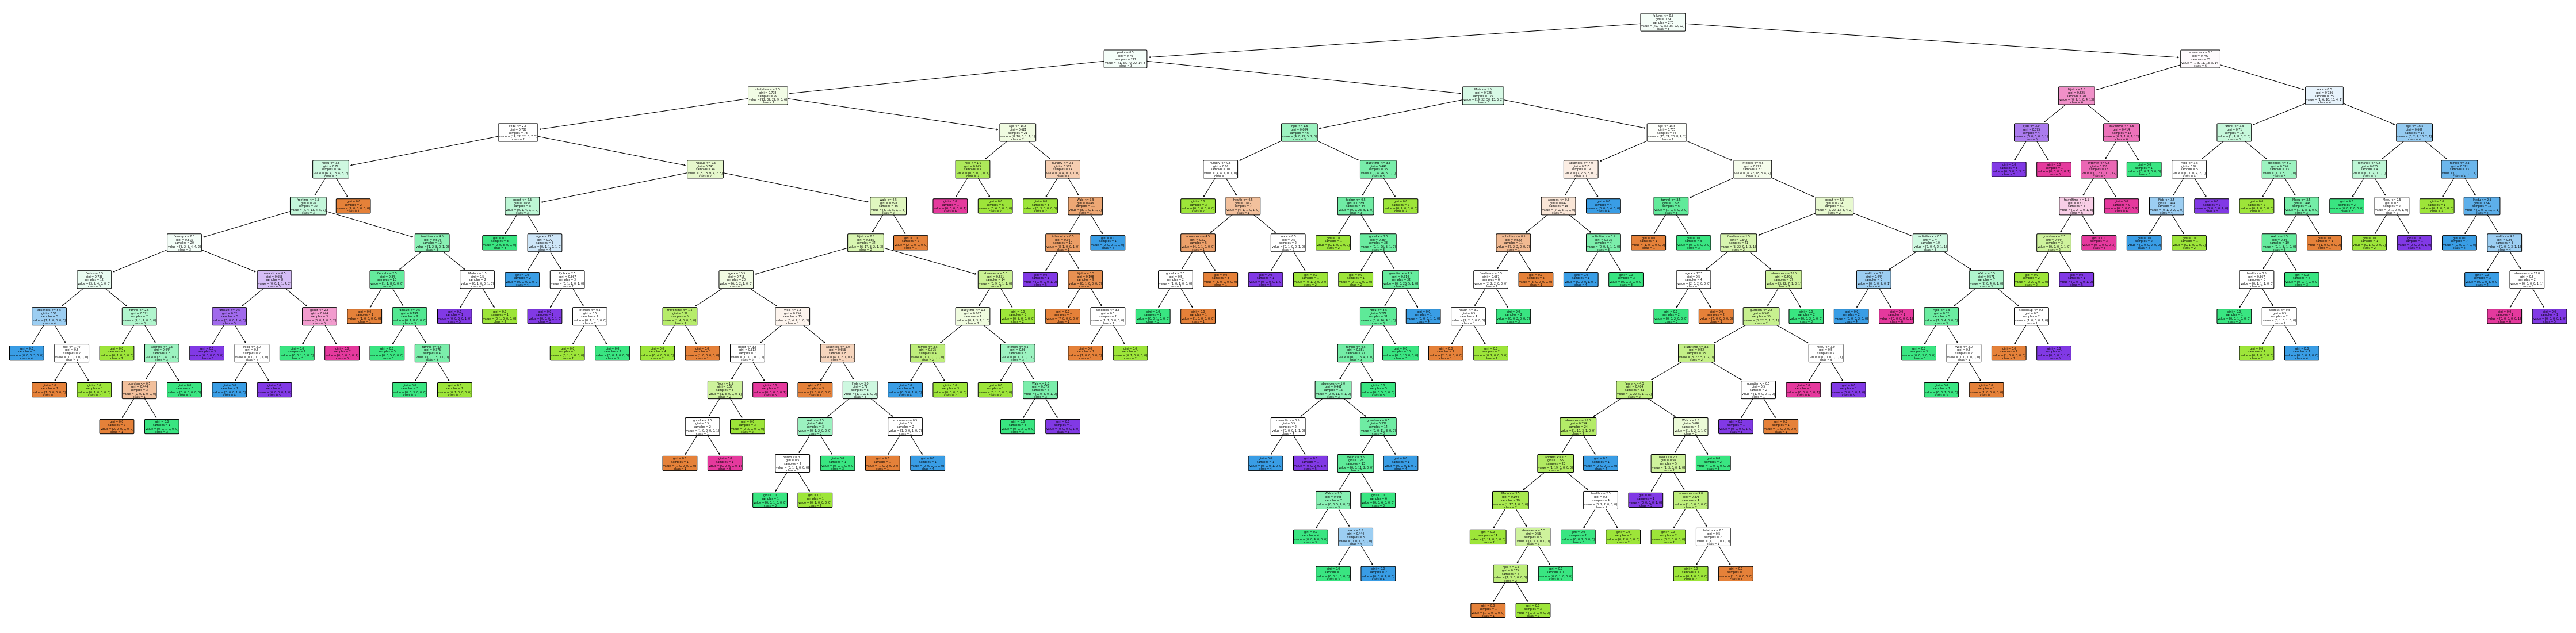

In [97]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_name4 = ['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup', 'paid','activities','nursery','higher','internet','romantic','age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','health','Dalc','absences','Walc' ]
tn4 = ['1','2','3','4','5','6']
fig4 = plt.figure(figsize=(80, 20))
plot_tree(clf4, 
          feature_names=feature_name4,
          class_names=tn4, 
          filled=True, impurity=True, 
          rounded=True)
fig4.savefig('Decision_Tree8.png')